# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import sequential_feature_selector
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

# 2. Collect and load data

In [4]:
df = pd.read_csv('bigcity.csv.')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


# 3. Explore numeric variables - five number summary

In [5]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms

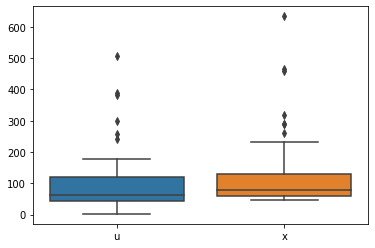

In [6]:
sns.boxplot(data=df)

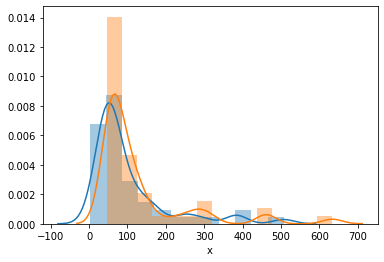

In [7]:
sns.distplot(df['u'], kde=True)
sns.distplot(df['x'],kde=True)

In [8]:
q3 = df['u'].quantile(0.75)
q1 = df['u'].quantile(0.25)
iqr = q3-q1
df = df.drop(df[df['u']>(q3+1.5*iqr)].index, axis=0)

In [9]:
q3 = df['x'].quantile(0.75)
q1 = df['x'].quantile(0.25)
iqr = q3-q1
df = df.drop(df[df['x']>(q3+1.5*iqr)].index, axis=0)

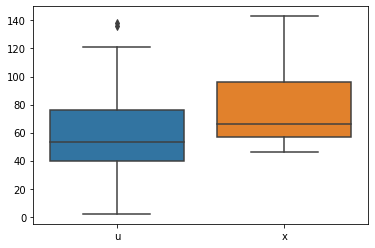

In [10]:
sns.boxplot(data=df)

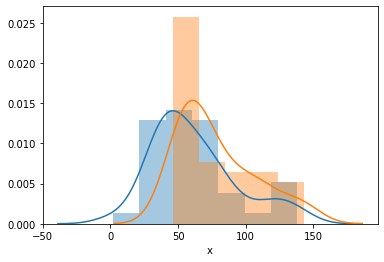

In [11]:
sns.distplot(df['u'], kde=True)
sns.distplot(df['x'],kde=True)

In [12]:
df['u'].skew()

0.8537426618710453


# 3b. Measure spread – variance and standard deviation

In [13]:
print('Variance of the data : ',np.var(df))
print('Standard Deviation of the data : ',np.std(df))

Variance of the data :  u    976.6875
x    784.3275
dtype: float64
Standard Deviation of the data :  u    31.252000
x    28.005848
dtype: float64


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

Text(0.5, 1.0, "Scatterplot between 1920's Population and 1930s Population")

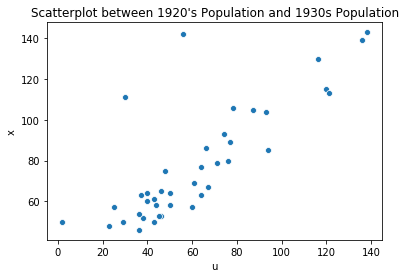

In [14]:
sns.scatterplot(x = df['u'], y=df['x'])
plt.title("Scatterplot between 1920's Population and 1930s Population")

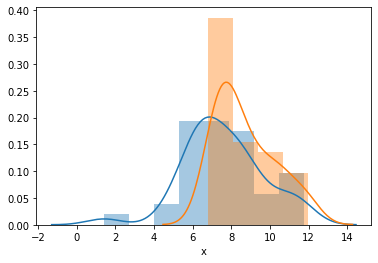

In [15]:
# Square Root Transformation for Better normality

df=df.transform(lambda x: np.sqrt(x))
sns.distplot(df['u'], kde=True)
sns.distplot(df['x'],kde=True)

In [16]:
df.skew()

u   -0.118249
x    0.752742
dtype: float64

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [17]:
print('Rows : ',df.shape[0])
print('Columns : ',df.shape[1])

Rows :  40
Columns :  2


In [18]:
y = df['u']
x = df.drop(['u'], axis=1)
x.shape

(40, 1)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [19]:
df.isnull().sum()

u    0
x    0
dtype: int64

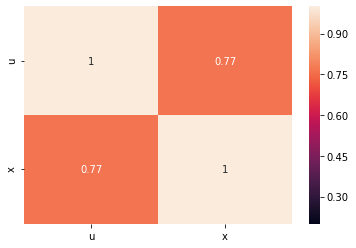

In [20]:
sns.heatmap(df.corr(), annot=True, vmin=0.2)

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [22]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)
print('b0 : ',lr.coef_)
print('b1 : ',lr.intercept_)

b0 :  [0.98453894]
b1 :  -1.039312145896127


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

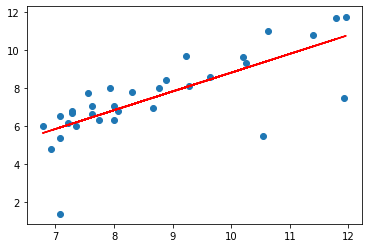

In [24]:
# ypred = lr.coef_*x_train + lr.intercept_

plt.scatter(x_train,y_train)
y_pred = lr.predict(x_train)
plt.plot(x_train, y_pred, 'r')

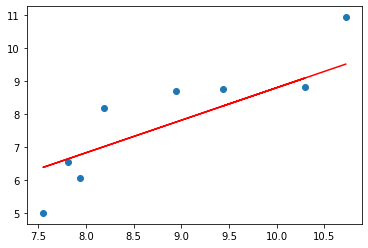

In [25]:
plt.scatter(x_test,y_test)
y_pred_test = lr.predict(x_test)
plt.plot(x_test,y_pred_test,'r')

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [29]:
print('R2 for Train:',r2_score(y_train, y_pred))
print('RMSE for Train:',np.sqrt(mean_squared_error(y_train, y_pred)))

R2 for Train: 0.5577398453357842
RMSE for Train: 1.3916262534502508


In [30]:
print('R2 for Test:',r2_score(y_test, y_pred_test))
print('RMSE for Test:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 for Test: 0.7184275062900648
RMSE for Test: 0.9422923102894053


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [34]:
print('Train Accuracy:',lr.score(x_train, y_train))

Train Accuracy: 0.5577398453357842


In [33]:
print('Test Accuracy:',lr.score(x_test, y_test))

Test Accuracy: 0.7184275062900649
